In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
from pandas import read_csv , set_option
from pandas.plotting import scatter_matrix

In [9]:
df = pd.read_csv("/content/Tannu Prajapati - heart_v2 - Tannu Prajapati - heart_v2.csv")
df.head(3)

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1


In [10]:
df.isnull().sum()

,0
age,0
sex,0
BP,0
cholestrol,0
heart disease,0


In [11]:
df.shape

(270, 5)

In [12]:
class_names = {0 : 'Not disease' , 1 : 'disease'}
print(df['heart disease'].value_counts().rename(index = class_names))

heart disease
Not disease    150
disease        120
Name: count, dtype: int64


In [46]:
from sklearn.model_selection import train_test_split
y = df['heart disease']
X = df.loc[:, df.columns != 'heart disease']
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size = 1 / 3 , random_state = 10 , stratify = y)


In [14]:
from sklearn.metrics import accuracy_score

#import library
from sklearn.linear_model import LogisticRegression

#Intialize the logistics Regression Classifer
logisreg = LogisticRegression()

#train the model
logisreg.fit(X_train , y_train)

#prediciton using test data
y_pred = logisreg.predict(X_test)

acc_logisreg = round(accuracy_score(y_test , y_pred) * 100 , 2)
print("Accuracy of Logitcs Regression model :" , acc_logisreg)

Accuracy of Logitcs Regression model : 68.89


In [39]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

#train the model
model.fit(X_train , y_train)

#prediciton using test data
y_pred = model.predict(X_test)

acc_gu = round(accuracy_score(y_test , y_pred) * 100 , 2)
print("Accuracy of DecisionTree model :" , acc_gu)

Accuracy of DecisionTree model : 66.67


In [52]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

#train the model
model.fit(X_train , y_train)

#prediciton using test data
y_pred = model.predict(X_test)

acc_gu = round(accuracy_score(y_test , y_pred) * 100 , 2)
print("Accuracy of RandomForest model :" , acc_gu)

Accuracy of RandomForest model : 71.11


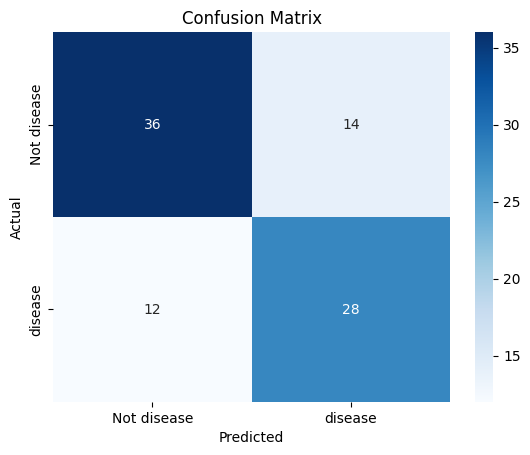

In [53]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names.values(), yticklabels=class_names.values())
pyplot.xlabel('Predicted')
pyplot.ylabel('Actual')
pyplot.title('Confusion Matrix')
pyplot.show()


In [1]:
# Install required libraries (only run once in Colab)
!pip install streamlit pyngrok --quiet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.1 MB/s eta 0:00:00


In [18]:
import joblib

# Save the model
joblib.dump(model, 'heart_disease_model.pkl')

# Save the feature names used in the model
joblib.dump(X.columns.tolist(), 'model_features.pkl')


['model_features.pkl']

In [37]:
%%writefile app.py
import streamlit as st
import numpy as np
import joblib
from sklearn.preprocessing import LabelEncoder

st.set_page_config(page_title="Heart Disease Risk", page_icon="❤️", layout="centered")

# Load model and feature names
try:
    model = joblib.load('heart_disease_model.pkl')
    features = joblib.load('model_features.pkl')
except Exception as e:
    st.error(f"Error loading model or features: {e}")
    st.stop()

st.title("❤️ Heart Disease Prediction")
st.markdown("This app predicts the **risk of heart disease** based on health parameters.")

st.sidebar.header("📝 Enter Patient Details")

# Initialize LabelEncoder for the sex feature
label_encoder = LabelEncoder()

# Collect input from user via sidebar
user_input = []
user_input_dict = {}  # For displaying input values
for feature in features:
    if feature.lower() == 'sex':  # Handle the 'sex' feature
        val = st.sidebar.selectbox(f"{feature}", options=["male", "female"])
        # Encode 'male' as 0 and 'female' as 1
        val = label_encoder.fit_transform([val])[0]
    else:
        val = st.sidebar.number_input(f"{feature}", min_value=0.0, step=1.0, format="%.2f")
    user_input.append(val)
    user_input_dict[feature] = val  # Store input values for display

if st.sidebar.button("🔍 Predict"):
    input_array = np.array([user_input])

    # Display the input values before prediction
    st.subheader("📝 Entered Patient Details:")
    for feature, value in user_input_dict.items():
        st.write(f"{feature}: {value}")

    try:
        prediction = model.predict(input_array)[0]
        proba = model.predict_proba(input_array)[0][1]  # Probability of class 1 (high risk)

        st.subheader("📊 Prediction Result")
        if prediction == 1:
            st.error(f"⚠️ High risk of heart disease.\nProbability: **{proba:.2%}**")
        else:
            st.success(f"✅ Low risk detected.\nProbability: **{proba:.2%}**")
    except Exception as e:
        st.error(f"Prediction error: {e}")


Overwriting app.py


In [23]:
!ngrok config add-authtoken 2vLqJUW6fTgC0kzUwb7VJIjuGTi_44uDnGCxi6qh2bT1uXsLW

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
from pyngrok import ngrok

# Run Streamlit app
!streamlit run app.py &>/content/log.txt &

# Connect ngrok to the streamlit port
public_url = ngrok.connect(addr="8501", proto="http")
print("Streamlit App URL:", public_url)


Streamlit App URL: NgrokTunnel: "https://e4b1-34-127-7-205.ngrok-free.app" -> "http://localhost:8501"
